In [1]:
#importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from sklearn import metrics


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
covid19 = pd.read_csv("original.csv")

In [3]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28825 entries, 0 to 28824
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               28825 non-null  int64  
 1   RecordNo            28825 non-null  object 
 2   endtime             28825 non-null  object 
 3   qweek               28825 non-null  object 
 4   i1_health           28825 non-null  int64  
 5   i2_health           28825 non-null  int64  
 6   i7a_health          28825 non-null  int64  
 7   i3_health           28825 non-null  object 
 8   i4_health           28825 non-null  object 
 9   i5_health_1         28825 non-null  object 
 10  i5_health_2         28825 non-null  object 
 11  i5_health_3         28825 non-null  object 
 12  i5_health_4         28825 non-null  object 
 13  i5_health_5         28825 non-null  object 
 14  i5_health_99        28825 non-null  object 
 15  i5a_health          28825 non-null  object 
 16  i6_h

In [4]:
# Number of records and variables
covid19.shape

(28825, 79)

In [5]:
# The function for changing uncertain values to missing values

uncertain_option = ['Not sure','Prefer not to say',"Don't know"]

def missing_value_rescale(column_value):
    if column_value in uncertain_option:
        return None
    else:
        return column_value
        
missing_value_rescale('Not sure')

In [6]:
# Applying the function to variables that have uncertain values

covid19['i4_health'] = covid19['i4_health'].apply(missing_value_rescale)

covid19['i5a_health'] = covid19['i5a_health'].apply(missing_value_rescale)

covid19['i8_health'] = covid19['i8_health'].apply(missing_value_rescale)

covid19['i9_health'] = covid19['i9_health'].apply(missing_value_rescale)

covid19['i10_health'] = covid19['i10_health'].apply(missing_value_rescale)

covid19['i11_health'] = covid19['i11_health'].apply(missing_value_rescale)

covid19['household_size'] = covid19['household_size'].apply(missing_value_rescale)

covid19['household_children'] = covid19['household_children'].apply(missing_value_rescale)

In [7]:
# The function for changing binary variables to dummy variables

def two_value_rescale(column_value):
    if column_value == None or column_value == ' ':
        return None
    elif column_value == 'Yes':
        return 1
    else:
        return 0

In [8]:
# Applying the function to binary variables

covid19['i5_health_1'] = covid19['i5_health_1'].apply(two_value_rescale)

covid19['i5_health_2'] = covid19['i5_health_2'].apply(two_value_rescale)

covid19['i5_health_3'] = covid19['i5_health_3'].apply(two_value_rescale)

covid19['i5_health_4'] = covid19['i5_health_4'].apply(two_value_rescale)

covid19['i5_health_5'] = covid19['i5_health_5'].apply(two_value_rescale)

covid19['i5_health_99'] = covid19['i5_health_99'].apply(two_value_rescale)

covid19['i5a_health'] = covid19['i5a_health'].apply(two_value_rescale)

covid19['i7b_health'] = covid19['i7b_health'].apply(two_value_rescale)

covid19['i8_health'] = covid19['i8_health'].apply(two_value_rescale)

covid19['i9_health'] = covid19['i9_health'].apply(two_value_rescale)

covid19['i14_health_1'] = covid19['i14_health_1'].apply(two_value_rescale)

covid19['i14_health_2'] = covid19['i14_health_2'].apply(two_value_rescale)

covid19['i14_health_3'] = covid19['i14_health_3'].apply(two_value_rescale)

covid19['i14_health_4'] = covid19['i14_health_4'].apply(two_value_rescale)

covid19['i14_health_5'] = covid19['i14_health_5'].apply(two_value_rescale)

covid19['i14_health_6'] = covid19['i14_health_6'].apply(two_value_rescale)

covid19['i14_health_7'] = covid19['i14_health_7'].apply(two_value_rescale)

covid19['i14_health_8'] = covid19['i14_health_8'].apply(two_value_rescale)

covid19['i14_health_9'] = covid19['i14_health_9'].apply(two_value_rescale)

covid19['i14_health_10'] = covid19['i14_health_10'].apply(two_value_rescale)

covid19['i14_health_96'] = covid19['i14_health_96'].apply(two_value_rescale)

covid19['i14_health_98'] = covid19['i14_health_98'].apply(two_value_rescale)

covid19['i14_health_99'] = covid19['i14_health_99'].apply(two_value_rescale)

covid19['d1_health_1'] = covid19['d1_health_1'].apply(two_value_rescale)

covid19['d1_health_2'] = covid19['d1_health_2'].apply(two_value_rescale)

covid19['d1_health_3'] = covid19['d1_health_3'].apply(two_value_rescale)

covid19['d1_health_4'] = covid19['d1_health_4'].apply(two_value_rescale)

covid19['d1_health_5'] = covid19['d1_health_5'].apply(two_value_rescale)

covid19['d1_health_6'] = covid19['d1_health_6'].apply(two_value_rescale)

covid19['d1_health_7'] = covid19['d1_health_7'].apply(two_value_rescale)

covid19['d1_health_8'] = covid19['d1_health_8'].apply(two_value_rescale)

covid19['d1_health_9'] = covid19['d1_health_9'].apply(two_value_rescale)

covid19['d1_health_10'] = covid19['d1_health_10'].apply(two_value_rescale)

covid19['d1_health_11'] = covid19['d1_health_11'].apply(two_value_rescale)

covid19['d1_health_12'] = covid19['d1_health_12'].apply(two_value_rescale)

covid19['d1_health_13'] = covid19['d1_health_13'].apply(two_value_rescale)

covid19['d1_health_98'] = covid19['d1_health_98'].apply(two_value_rescale)

covid19['d1_health_99'] = covid19['d1_health_99'].apply(two_value_rescale)

In [9]:
# The function for changing  variables with sequenced options to a scaled variable
five_option1 = ['Very easy','Very willing','Always']
five_option2 = ['Somewhat easy', 'Somewhat willing','Frequently']
five_option3 = ['Neither easy nor difficult','Neither willing nor unwilling','Sometimes']
five_option4 = ['Somewhat difficult','Somewhat unwilling','Rarely']

def five_value_rescale(column_value):
    if column_value == None or column_value == ' ':
        return None
    elif column_value in five_option1:
        return 1
    elif column_value in five_option2:
        return 2
    elif column_value in five_option3:
        return 3
    elif column_value in five_option4:
        return 4
    else:
        return 5

In [10]:
# Applying the function to variables with sequenced options

covid19['i6_health'] = covid19['i6_health'].apply(five_value_rescale)

covid19['i10_health'] = covid19['i10_health'].apply(five_value_rescale)

covid19['i11_health'] = covid19['i11_health'].apply(five_value_rescale)

covid19['i12_health_1'] = covid19['i12_health_1'].apply(five_value_rescale)

covid19['i12_health_2'] = covid19['i12_health_2'].apply(five_value_rescale)

covid19['i12_health_3'] = covid19['i12_health_3'].apply(five_value_rescale)

covid19['i12_health_4'] = covid19['i12_health_4'].apply(five_value_rescale)

covid19['i12_health_5'] = covid19['i12_health_5'].apply(five_value_rescale)

covid19['i12_health_6'] = covid19['i12_health_6'].apply(five_value_rescale)

covid19['i12_health_7'] = covid19['i12_health_7'].apply(five_value_rescale)

covid19['i12_health_8'] = covid19['i12_health_8'].apply(five_value_rescale)

covid19['i12_health_9'] = covid19['i12_health_9'].apply(five_value_rescale)

covid19['i12_health_10'] = covid19['i12_health_10'].apply(five_value_rescale)

covid19['i12_health_11'] = covid19['i12_health_11'].apply(five_value_rescale)

covid19['i12_health_12'] = covid19['i12_health_12'].apply(five_value_rescale)

covid19['i12_health_13'] = covid19['i12_health_13'].apply(five_value_rescale)

covid19['i12_health_14'] = covid19['i12_health_14'].apply(five_value_rescale)

covid19['i12_health_15'] = covid19['i12_health_15'].apply(five_value_rescale)

covid19['i12_health_16'] = covid19['i12_health_16'].apply(five_value_rescale)

covid19['i12_health_17'] = covid19['i12_health_17'].apply(five_value_rescale)

covid19['i12_health_18'] = covid19['i12_health_18'].apply(five_value_rescale)

covid19['i12_health_19'] = covid19['i12_health_19'].apply(five_value_rescale)

covid19['i12_health_20'] = covid19['i12_health_20'].apply(five_value_rescale)

In [11]:
# Rescaling qweek variable to as a scaled variable
def qweek_rescale(qweek):
    if qweek == None or qweek == ' ':
        return None
    else:
        last_str = len(qweek)
        str_num = qweek[last_str-1]
        num_int = int(str_num)
        return num_int

qweek_rescale('week 1')

covid19['qweek']=covid19['qweek'].apply(qweek_rescale)

In [12]:
# Changing household_size to a numerical variable

def household_size_rescale(size):
    if size == None or size == '' :
        return None
    elif size == '8 or more':
        return 8
    else:
        num_int = int(size)
        return num_int
    
covid19['household_size']=covid19['household_size'].apply(household_size_rescale)

In [13]:
# Changing household_children to a numerical variable

def household_children_rescale(children):
    if children == None or children == ' ':
        return None
    elif children == '5 or more':
        return 5
    else:
        num_int = int(children)
        return num_int
    
covid19['household_children']=covid19['household_children'].apply(household_children_rescale)

In [14]:
# reclassification of region_state based regions in Canada and USA

canada_north = ['Northwest Territories / Territoires du Nord-Ouest','Nunavut','Yukon']
canada_west_prairies = ['Alberta','British Columbia / Colombie Britanique','Saskatchewan','Manitoba']
canada_east = ['New Brunswick / Nouveau-Brunswick','Nova Scotia / Nouvelle-Écosse','Newfoundland & Labrador / Terre-Neuve-et-Labrador', 'Prince Edward Island / Île-du-Prince-Édouard']
canada_central = ['Quebec / Québec','Ontario']
usa_northeast = ['Connecticut', 'Maine','Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
usa_midwest = ['Indiana','Illinois','Michigan','Ohio','Wisconsin','Iowa','Nebraska','Kansas','North Dakota','Minnesota','South Dakota','Missouri']
usa_south = ['Delaware', 'District of Columbia', 'Florida','Georgia','Maryland','North Carolina','South Carolina','Virginia','West Virginia','Alabama','Kentucky','Mississippi','Tennessee','Arkansas','Louisiana','Oklahoma','Texas']
usa_west = ['Arizona', 'Colorado', 'Idaho', 'New Mexico', 'Montana', 'Utah', 'Nevada', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

def region_recode(region_state):
    if region_state == None or region_state == ' ':
        return None
    elif region_state in canada_north:
        return 'canada_north'
    elif region_state in canada_west_prairies:
        return 'canada_west_prairies'
    elif region_state in canada_east:
        return 'canada_east'
    elif region_state in canada_central:
        return 'canada_central'
    elif region_state in usa_northeast:
        return 'usa_northeast'
    elif region_state in usa_midwest:
        return 'usa_midwest'
    elif region_state in usa_south:
        return 'usa_south'
    else:
        return 'usa_west'


covid19['region_state']=covid19['region_state'].apply(region_recode)

In [15]:
# Changing i3_health to a numerical variable

def i3_rescale(column_value):
    if column_value == 'No, I have not':
        return 1
    elif column_value == 'Yes, and I have not received my results from the test yet':
        return 2
    elif column_value == 'Yes, and I tested negative':
        return 3
    elif column_value == 'Yes, and I tested positive':
        return 4
    
covid19['i3_health'] = covid19['i3_health'].apply(i3_rescale)
   
# Changing i4_health to a numerical variable    
def i4_rescale(column_value):
    if column_value == 'No, they have not':
        return 1
    elif column_value == 'Yes, and they have not received their results from the test yet':
        return 2
    elif column_value == 'Yes, and they tested negative':
        return 3
    elif column_value == 'Yes, and they tested positive':
        return 4

covid19['i4_health'] = covid19['i4_health'].apply(i4_rescale)

In [16]:
np.random.seed(10)

covid19['i3_health'] = covid19['i3_health'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['i3_health'].min(), covid19['i3_health'].max()))


covid19['i4_health'] = covid19['i4_health'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['i4_health'].min(), covid19['i4_health'].max()))


In [17]:
def i3_rescale_back(column_value):
    if column_value == 1:
        return 'No, I have not'
    elif column_value == 2:
        return 'Yes, and I have not received my results from the test yet'
    elif column_value == 3:
        return 'Yes, and I tested negative'
    elif column_value == 4:
        return 'Yes, and I tested positive'
    
covid19['i3_health'] = covid19['i3_health'].apply(i3_rescale_back)
    
def i4_rescale_back(column_value):
    if column_value == 1:
        return 'No, they have not'
    elif column_value == 2:
        return 'Yes, and they have not received their results from the test yet'
    elif column_value == 3:
        return 'Yes, and they tested negative'
    elif column_value == 4:
        return 'Yes, and they tested positive'

covid19['i4_health'] = covid19['i4_health'].apply(i4_rescale_back)

In [18]:

covid19['i5_health_1'] = covid19['i5_health_1'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['i5_health_1'].min(), covid19['i5_health_1'].max()))

covid19['i5_health_2'] = covid19['i5_health_2'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['i5_health_2'].min(), covid19['i5_health_2'].max()))

covid19['i5_health_3'] = covid19['i5_health_3'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['i5_health_3'].min(), covid19['i5_health_3'].max()))

covid19['i5_health_4'] = covid19['i5_health_4'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['i5_health_4'].min(), covid19['i5_health_4'].max()))

covid19['i5_health_5'] = covid19['i5_health_5'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['i5_health_5'].min(), covid19['i5_health_5'].max()))

covid19['i5_health_99'] = covid19['i5_health_99'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['i5_health_99'].min(), covid19['i5_health_99'].max()))

covid19['i9_health'] = covid19['i9_health'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['i9_health'].min(), covid19['i9_health'].max()))

covid19['i10_health'] = covid19['i10_health'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['i10_health'].min(), covid19['i10_health'].max()))

covid19['i11_health'] = covid19['i11_health'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['i11_health'].min(), covid19['i11_health'].max()))

In [19]:
covid19['i12_health_9'] = covid19['i12_health_9'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['i12_health_9'].min(), covid19['i12_health_9'].max()))

In [20]:
covid19['i14_health_1'] = covid19['i14_health_1'].apply(lambda x: x if pd.notnull(x) else 0)
covid19['i14_health_2'] = covid19['i14_health_2'].apply(lambda x: x if pd.notnull(x) else 0)
covid19['i14_health_3'] = covid19['i14_health_3'].apply(lambda x: x if pd.notnull(x) else 0)
covid19['i14_health_4'] = covid19['i14_health_4'].apply(lambda x: x if pd.notnull(x) else 0)
covid19['i14_health_5'] = covid19['i14_health_5'].apply(lambda x: x if pd.notnull(x) else 0)
covid19['i14_health_6'] = covid19['i14_health_6'].apply(lambda x: x if pd.notnull(x) else 0)
covid19['i14_health_7'] = covid19['i14_health_7'].apply(lambda x: x if pd.notnull(x) else 0)
covid19['i14_health_8'] = covid19['i14_health_8'].apply(lambda x: x if pd.notnull(x) else 0)
covid19['i14_health_9'] = covid19['i14_health_9'].apply(lambda x: x if pd.notnull(x) else 0)
covid19['i14_health_10'] = covid19['i14_health_10'].apply(lambda x: x if pd.notnull(x) else 0)
covid19['i14_health_96'] = covid19['i14_health_96'].apply(lambda x: x if pd.notnull(x) else 0)
covid19['i14_health_98'] = covid19['i14_health_98'].apply(lambda x: x if pd.notnull(x) else 0)
covid19['i14_health_99'] = covid19['i14_health_99'].apply(lambda x: x if pd.notnull(x) else 0)

In [21]:
covid19['d1_health_1'] = covid19['d1_health_1'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_1'].min(), covid19['d1_health_1'].max()))

covid19['d1_health_2'] = covid19['d1_health_2'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_2'].min(), covid19['d1_health_2'].max()))

covid19['d1_health_3'] = covid19['d1_health_3'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_3'].min(), covid19['d1_health_3'].max()))

covid19['d1_health_4'] = covid19['d1_health_4'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_4'].min(), covid19['d1_health_4'].max()))

covid19['d1_health_5'] = covid19['d1_health_5'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_5'].min(), covid19['d1_health_5'].max()))

covid19['d1_health_6'] = covid19['d1_health_6'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_6'].min(), covid19['d1_health_6'].max()))

covid19['d1_health_7'] = covid19['d1_health_7'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_7'].min(), covid19['d1_health_7'].max()))

covid19['d1_health_8'] = covid19['d1_health_8'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_8'].min(), covid19['d1_health_8'].max()))

covid19['d1_health_9'] = covid19['d1_health_9'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_9'].min(), covid19['d1_health_9'].max()))

covid19['d1_health_10'] = covid19['d1_health_10'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_10'].min(), covid19['d1_health_10'].max()))

covid19['d1_health_11'] = covid19['d1_health_11'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_11'].min(), covid19['d1_health_11'].max()))

covid19['d1_health_12'] = covid19['d1_health_12'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_12'].min(), covid19['d1_health_12'].max()))

covid19['d1_health_13'] = covid19['d1_health_13'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_13'].min(), covid19['d1_health_13'].max()))

covid19['d1_health_98'] = covid19['d1_health_98'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_98'].min(), covid19['d1_health_98'].max()))

covid19['d1_health_99'] = covid19['d1_health_99'].apply(lambda x: x if pd.notnull(x) 
                                                  else np.random.randint(covid19['d1_health_99'].min(), covid19['d1_health_99'].max()))

In [22]:
# Dropping columns
covid19 = covid19.drop(['i5a_health', 'i6_health', 'i7b_health', 'i8_health', 'endtime', 
                                    'i14_health_other'], axis = 1)

In [23]:
covid19_final = covid19

In [24]:
# Brief overview of data
covid19_final.shape

(28825, 73)

In [25]:
covid19_final.to_csv('covid19_transformed.csv')

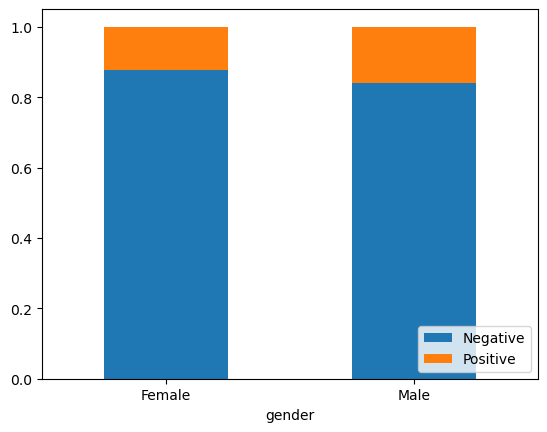

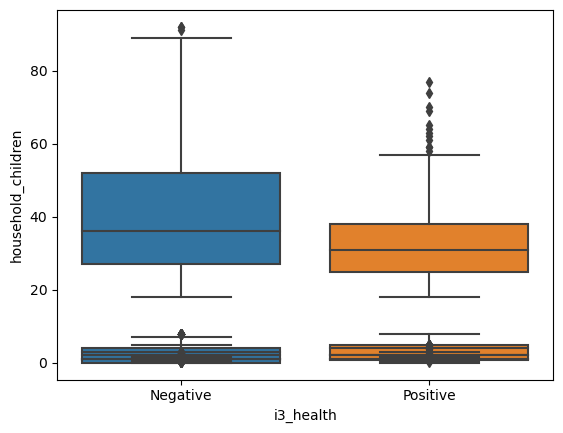

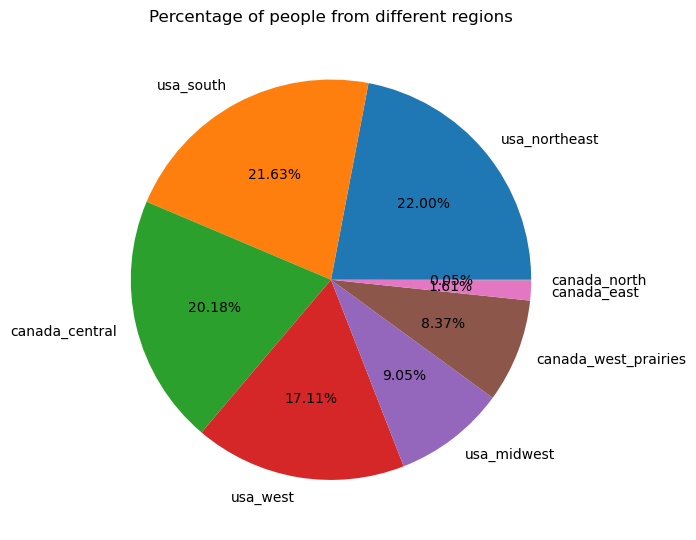

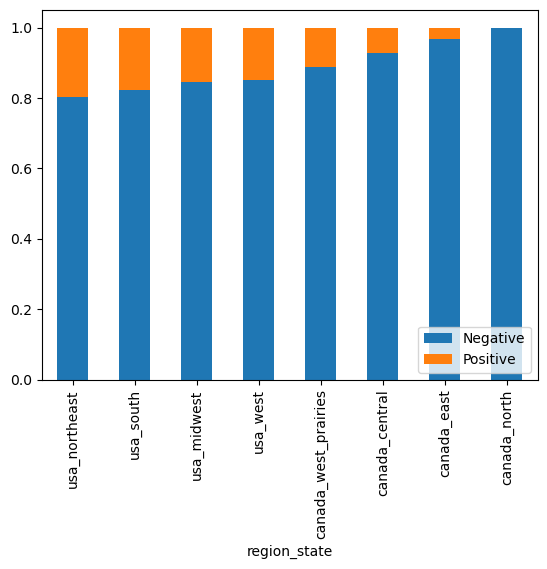

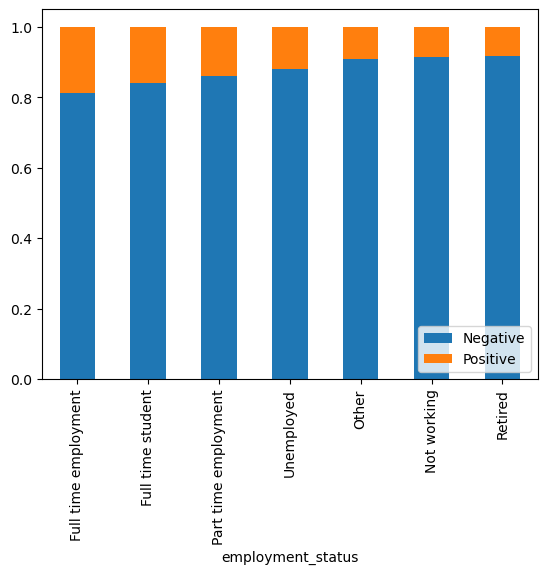

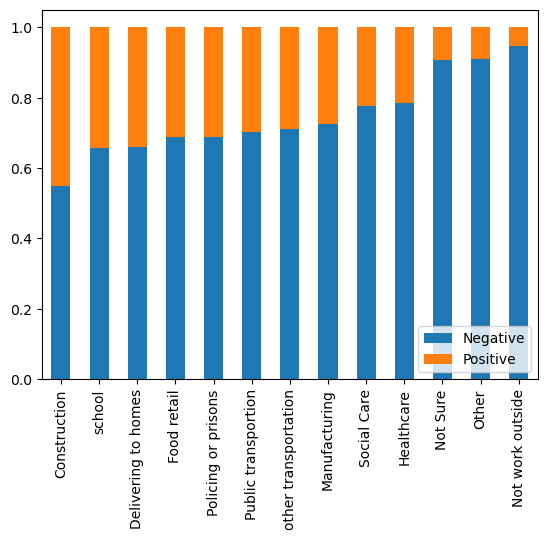

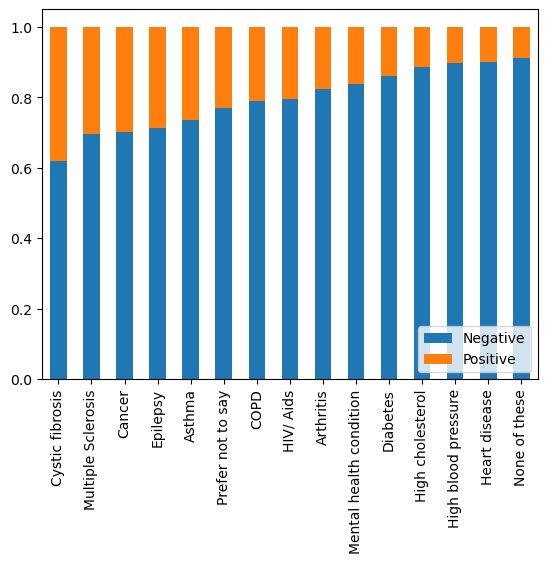

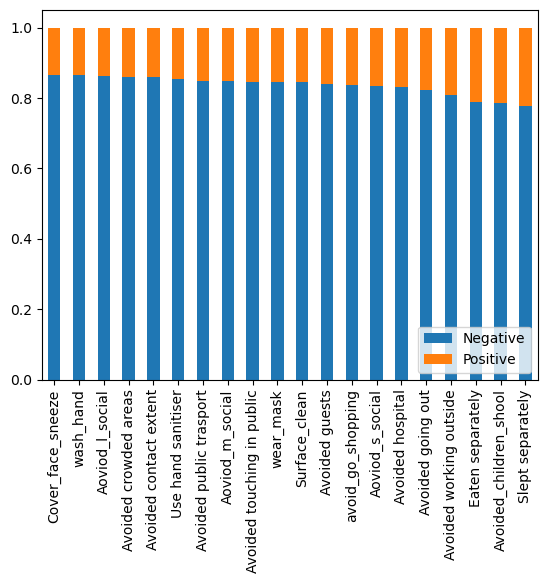

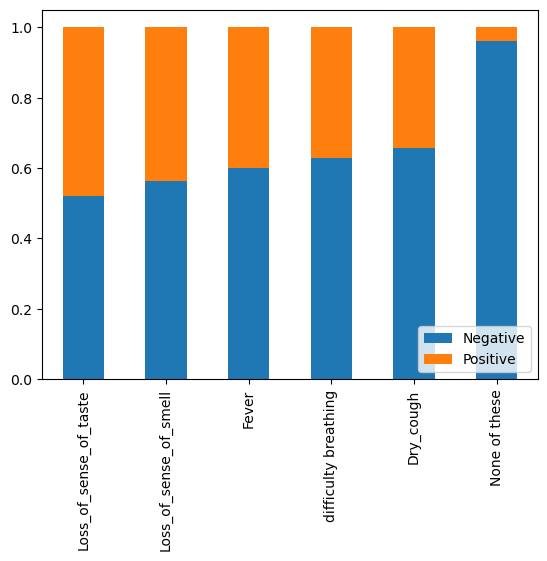

In [26]:
#Import data

data=pd.read_csv("covid19_transformed.csv")
data.head()
#delete the first column and define index of dataframe
data=data.drop(columns='Unnamed: 0')
data.set_index(['Index'],inplace=True)
#drop the untested rows
def i3_rescale(column_value):
    if column_value == 'No, I have not':
        return 1
    elif column_value == 'Yes, and I have not received my results from the test yet':
        return 2
    elif column_value == 'Yes, and I tested negative':
        return 3
    elif column_value == 'Yes, and I tested positive':
        return 4
np.random.seed(10)
data['i3_health'] = data['i3_health'].apply(lambda x: x if pd.notnull(x)
                                                  else np.random.randint(data['i3_health'].min(), data['i3_health'].max()))
data['i3_health'] = data['i3_health'].apply(i3_rescale)
data=data[(data['i3_health']==3) | (data['i3_health']==4)]
data['i3_health'] =data['i3_health'].replace(3.0, 'Negative')
data['i3_health'] =data['i3_health'].replace(4.0, 'Positive')



##################STEP2: DEMOGRAPHIC CHARACTERISTIC DEPICTION###############
#gender
data_crosstab=pd.crosstab(data['i3_health'],data['gender'],margins=False)
data_crosstab=data_crosstab.transpose()
data_crosstab_norm=data_crosstab.div(data_crosstab.sum(axis=1),axis=0)
data_crosstab_norm
data_crosstab_norm.plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show(block=True)
# age,weight,household_size,household_children
#age
sns.boxplot(x=data['i3_health'],y=data['age'],data=data)
#weight
data_test=data[data['weight']<3]
sns.boxplot(x=data_test['i3_health'],y=data_test['weight'],data=data)
#household size
sns.boxplot(x=data['i3_health'],y=data['household_size'],data=data)
#household_children
sns.boxplot(x=data['i3_health'],y=data['household_children'],data=data)
   #np.nanmean(data[data['i3_health']=='Positive']['household_children'])
#region_state
#region_state_1
region_state_count=data['region_state'].value_counts()
sum_num=data.shape[0]
y=[]
for i in range(len(region_state_count)):
    y.append(region_state_count[i]/sum_num)
plt.figure(figsize=(20, 6.5))
plt.pie(y,
        labels=region_state_count.index[:], 
        autopct='%.2f%%', 
       )
plt.title("Percentage of people from different regions")
#region_state_2
data_crosstab=pd.crosstab(data['i3_health'],data['region_state'],margins=False)
data_crosstab=data_crosstab.transpose()
data_crosstab_norm=data_crosstab.div(data_crosstab.sum(axis=1),axis=0)
data_crosstab_norm
data_crosstab_norm_sort=data_crosstab_norm.sort_values(by='Positive', ascending=False)
data_crosstab_norm_sort.plot(kind='bar',stacked=True)
    #plt.show(block=True)
plt.legend(loc="lower right")
#employment_status
data_crosstab=pd.crosstab(data['i3_health'],data['employment_status'],margins=False)
data_crosstab=data_crosstab.transpose()
data_crosstab_norm=data_crosstab.div(data_crosstab.sum(axis=1),axis=0)
data_crosstab_norm
data_crosstab_norm_sort=data_crosstab_norm.sort_values(by='Positive', ascending=False)
data_crosstab_norm_sort.plot(kind='bar',stacked=True)
plt.legend(loc="lower right")
#occupations
data_crosstab= pd.DataFrame(np.empty(shape=(13,2)))
data_crosstab.columns=['Negative', 'Positive']
data_crosstab.index=['Construction', 'Delivering to homes', 'Food retail', 'Healthcare', 'other transportation',
             'Manufacturing','Policing or prisons','Public transportion', 'school', 'Social Care', 'Other', 'Not Sure', 'Not work outside']
for i in range(37,50):
    dc = pd.crosstab(data['i3_health'], data.iloc[:,i], margins=False)
    dc = dc.transpose()
    dc_norm = dc.div(dc.sum(axis=1), axis=0)
    data_crosstab.iloc[i-37,0]=dc_norm.iloc[1,0]
    data_crosstab.iloc[i-37,1] = dc_norm.iloc[1,1]
data_crosstab=data_crosstab.sort_values(by='Positive', ascending=False)
data_crosstab.plot(kind='bar',stacked=True)
plt.legend(loc="lower right")


##################STEP3: DISEASE & SYMPOTOM & HATBIT###############
#Disease
data_crosstab= pd.DataFrame(np.empty(shape=(15,2)))
data_crosstab.columns=['Negative', 'Positive']
data_crosstab.index=['Arthritis', 'Asthma', 'Cancer', 'Cystic fibrosis', 'COPD',
             'Diabetes','Epilepsy','Heart disease', 'High blood pressure','High cholesterol','HIV/ Aids', 'Mental health condition', 'Multiple Sclerosis', 'Prefer not to say', 'None of these']
for i in range(50,65):
    dc = pd.crosstab(data['i3_health'], data.iloc[:,i], margins=False)
    dc = dc.transpose()
    dc_norm = dc.div(dc.sum(axis=1), axis=0)
    data_crosstab.iloc[i-50,0]=dc_norm.iloc[1,0]
    data_crosstab.iloc[i-50,1] = dc_norm.iloc[1,1]
data_crosstab=data_crosstab.sort_values(by='Positive', ascending=False)
data_crosstab.plot(kind='bar',stacked=True)
plt.legend(loc="lower right")
#habit
data_crosstab= pd.DataFrame(np.empty(shape=(20,2)))
data_crosstab.columns=['Negative', 'Positive']
data_crosstab.index=['wear_mask', 'wash_hand', 'Use hand sanitiser', 'Cover_face_sneeze', 'Avoided contact extent',
             'Avoided going out','Avoided hospital','Avoided public trasport', 'Avoided working outside','Avoided_children_shool',
                     'Avoided guests', 'Aoviod_s_social', 'Aoviod_m_social', 'Aoviod_l_social', 'Avoided crowded areas',
                     'avoid_go_shopping','Slept separately','Eaten separately','Surface_clean','Avoided touching in public']
for i in range(16,36):
    dc = pd.crosstab(data['i3_health'], data.iloc[:,i], margins=False)
    dc = dc.transpose()
    new_dc=pd.DataFrame(np.empty(shape=(2,2)),columns=['Negative','Positive'],index=['1','0'])
    new_dc.iloc[0:,]=dc.iloc[0,:]+dc.iloc[1,:]
    new_dc.iloc[1:,]=dc.iloc[2,:]+dc.iloc[3,:]+dc.iloc[4,:]
    dc_norm = new_dc.div(new_dc.sum(axis=1), axis=0)
    data_crosstab.iloc[i-16,0]=dc_norm.iloc[0,0]
    data_crosstab.iloc[i-16,1] = dc_norm.iloc[0,1]
data_crosstab=data_crosstab.sort_values(by='Positive')
data_crosstab.plot(kind='bar',stacked=True)
plt.legend(loc="lower right")
#Symptom
data_crosstab= pd.DataFrame(np.empty(shape=(6,2)))
data_crosstab.columns=['Negative', 'Positive']
data_crosstab.index=['Dry_cough','Fever','Loss_of_sense_of_smell','Loss_of_sense_of_taste',
                     'difficulty breathing','None of these']
for i in range(7,13):
    dc = pd.crosstab(data['i3_health'], data.iloc[:,i], margins=False)
    dc = dc.transpose()
    dc_norm = dc.div(dc.sum(axis=1), axis=0)
    data_crosstab.iloc[i-7,0]=dc_norm.iloc[1,0]
    data_crosstab.iloc[i-7,1] = dc_norm.iloc[1,1]
data_crosstab=data_crosstab.sort_values(by='Positive',ascending=False)
data_crosstab.plot(kind='bar',stacked=True)
plt.legend(loc="lower right")




##################STEP4: Hypothesis test For Variables Selection###############
from scipy import stats
import numpy as np

a=data['age'].tolist()
def chi_test_singleline(target_name,predictor_name,data):
    target=data[target_name]
    target.replace(['Positive','Negative'],[1,0],inplace=True)
    predictors=data[predictor_name]
    data_crosstab = pd.crosstab(data[target_name], data[predictor_name], margins=False)
    data_crosstab = data_crosstab.transpose()
    data_crosstab_norm = data_crosstab.div(data_crosstab.sum(axis=1), axis=0)
    data_crosstab_norm
    data_crosstab_norm_sort = data_crosstab_norm.sort_values(by=1, ascending=False)
    rate_sequence_name=data_crosstab_norm_sort.index
    new_predictors=pd.DataFrame(np.empty(shape=(len(predictors),len(rate_sequence_name))))
    for k in range(len(rate_sequence_name)):
        for i in range(len(predictors)):
            if predictors.iloc[i] in rate_sequence_name[0:k+1]:
                new_predictors.iloc[i,k]=1
            else:
                new_predictors.iloc[i,k] = 0
    p_value=[]
    new_predictors['target'] = target.to_list()
    for k in range(len(rate_sequence_name)):
        stats_result=stats.chi2_contingency(pd.crosstab(new_predictors[k],new_predictors['target']))
        p_value.append(stats_result[1])
    seq=np.argmin(p_value)
    return(rate_sequence_name[0:seq+1])

def chi_test_multiline(target_name,predict_start,predict_end,data):
    #predictor_position_list=range(predict_start,predict_end+1)
    #target_name=str
    target=data[target_name]
    target.replace(['Positive','Negative'],[1,0],inplace=True)
    predictors=data.iloc[:,predict_start:predict_end+1]
    data_crosstab = pd.DataFrame(np.empty(shape=(predict_end-predict_start+1, 2)))
    data_crosstab.index = predictors.columns
    for i in range(predict_start,predict_end+1):
        dc = pd.crosstab(data[target_name], data.iloc[:, i], margins=False)
        dc = dc.transpose()
        dc_norm = dc.div(dc.sum(axis=1), axis=0)
        data_crosstab.iloc[i - predict_start, 0] = dc_norm.iloc[1, 0]
        data_crosstab.iloc[i - predict_start, 1] = dc_norm.iloc[1, 1]
    data_crosstab_norm_sort = data_crosstab.sort_values(by=1, ascending=False)
    rate_sequence_name = data_crosstab_norm_sort.index
    p_value=[]
    for k in range(predictors.shape[1]):
        new_predictors=pd.DataFrame(np.empty(shape=(len(target),1)))
        new_predictors=np.sum(predictors.iloc[:,0:k+1],axis=1)
        new_predictors=new_predictors.to_frame()
        new_predictors.columns=['value']
        new_predictors["value"][new_predictors.value>0]=1
        stats_result = stats.chi2_contingency(pd.crosstab(new_predictors["value"], target))
        p_value.append(stats_result[1])
    seq = np.argmin(p_value)
    return (rate_sequence_name[0:seq+1])

occupation_s=chi_test_multiline('i3_health',37,49,data)
symptom_s=chi_test_multiline('i3_health',7,12,data)
disease_s=chi_test_multiline('i3_health',50,64,data)

region_state_s=chi_test_singleline('i3_health','region_state',data)
employment_s=chi_test_singleline('i3_health','employment_status',data)


In [27]:
#Loading the Dataset
original = pd.read_csv("original.csv")

In [28]:
original.head()

,Index,RecordNo,endtime,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,...,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,region_state,household_size,household_children,employment_status
0,0,CAN0,02/04/2020 08:25,week 1,0,1,1,"No, I have not","No, they have not",No,...,No,No,No,1.036370,Male,73,British Columbia / Colombie Britanique,1,0,Retired
1,1,CAN1,02/04/2020 08:34,week 1,0,6,0,"No, I have not","No, they have not",Yes,...,No,No,Yes,1.016961,Female,37,British Columbia / Colombie Britanique,1,0,Unemployed
2,2,CAN2,02/04/2020 08:44,week 1,6,1,0,"No, I have not","No, they have not",No,...,No,No,No,1.003516,Male,25,Ontario,8 or more,2,Full time employment
3,3,CAN3,02/04/2020 08:44,week 1,1,1,1,"No, I have not","No, they have not",No,...,No,No,No,1.002949,Male,66,Ontario,2,0,Retired
4,4,CAN4,02/04/2020 09:00,week 1,1,3,1,"No, I have not","No, they have not",No,...,No,No,Yes,1.028216,Female,25,British Columbia / Colombie Britanique,2,0,Unemployed


In [29]:
#We can see our dataset has 28,825 records
original = original.drop(columns=['Index'])
original.shape

(28825, 78)

In [30]:
original['i3_health'].value_counts()

No, I have not                                               26284
Yes, and I tested negative                                    1515
                                                               405
Yes, and I have not received my results from the test yet      341
Yes, and I tested positive                                     280
Name: i3_health, dtype: int64

In [31]:
#running KNN
knn_data = pd.read_csv("original.csv") #Loading dataset

knn_data = knn_data[['qweek','i2_health','i7a_health','i5_health_1','i5_health_2','i5_health_3','i5_health_4','i5_health_5','i14_health_1','i12_health_1','i12_health_2','i12_health_3','i12_health_4','i12_health_5','i12_health_6','i12_health_7','i12_health_8','i12_health_9','i12_health_11',
'i12_health_12','i12_health_13','i12_health_14','i12_health_15','i12_health_16','i12_health_20','d1_health_3','d1_health_4','d1_health_7','d1_health_13','gender','age','household_size','household_children','employment_status','i3_health']]
knn_data.head()

,qweek,i2_health,i7a_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i14_health_1,i12_health_1,...,d1_health_3,d1_health_4,d1_health_7,d1_health_13,gender,age,household_size,household_children,employment_status,i3_health
0,week 1,1,1,No,No,No,No,No,,Not at all,...,No,No,No,No,Male,73,1,0,Retired,"No, I have not"
1,week 1,6,0,Yes,No,No,No,No,,Not at all,...,No,No,No,No,Female,37,1,0,Unemployed,"No, I have not"
2,week 1,1,0,No,No,No,No,Yes,No,Frequently,...,No,No,No,No,Male,25,8 or more,2,Full time employment,"No, I have not"
3,week 1,1,1,No,No,No,No,No,,Frequently,...,No,No,No,No,Male,66,2,0,Retired,"No, I have not"
4,week 1,3,1,No,No,No,No,No,,Not at all,...,No,No,No,No,Female,25,2,0,Unemployed,"No, I have not"


In [32]:
#function to replace a missing value by most frequent observations which happens to be "No" in the below cases
def replace(column_value):
    if column_value == None or column_value == ' ':
        return "No"
    else:
        return column_value
    
knn_data['i5_health_1'] = knn_data['i5_health_1'].apply(replace)
knn_data['i5_health_2'] = knn_data['i5_health_2'].apply(replace)
knn_data['i5_health_3'] = knn_data['i5_health_3'].apply(replace)
knn_data['i5_health_4'] = knn_data['i5_health_4'].apply(replace)
knn_data['i5_health_5'] = knn_data['i5_health_5'].apply(replace)
knn_data['i14_health_1'] = knn_data['i14_health_1'].apply(replace)
knn_data['d1_health_3'] = knn_data['d1_health_3'].apply(replace)
knn_data['d1_health_4'] = knn_data['d1_health_4'].apply(replace)
knn_data['d1_health_7'] = knn_data['d1_health_7'].apply(replace)
knn_data['d1_health_13'] = knn_data['d1_health_13'].apply(replace)

In [33]:
#Now that we have dealt with the missing values for above columns we can perform 2 value re-scaling
def two_value_rescale(column_value):
    if column_value == 'Yes':
        return 1
    else:
        return 0
knn_data['i5_health_1'] = knn_data['i5_health_1'].apply(two_value_rescale)
knn_data['i5_health_2'] = knn_data['i5_health_2'].apply(two_value_rescale)
knn_data['i5_health_3'] = knn_data['i5_health_3'].apply(two_value_rescale)
knn_data['i5_health_4'] = knn_data['i5_health_4'].apply(two_value_rescale)
knn_data['i5_health_5'] = knn_data['i5_health_5'].apply(two_value_rescale)
knn_data['i14_health_1'] = knn_data['i14_health_1'].apply(two_value_rescale)
knn_data['d1_health_3'] = knn_data['d1_health_3'].apply(two_value_rescale)
knn_data['d1_health_4'] = knn_data['d1_health_4'].apply(two_value_rescale)
knn_data['d1_health_7'] = knn_data['d1_health_7'].apply(two_value_rescale)
knn_data['d1_health_13'] = knn_data['d1_health_13'].apply(two_value_rescale)

In [34]:
#Number coding columns as per their categories

def five_value_rescale(column_value):
    if column_value == 'Always':
        return 1
    elif column_value == 'Frequently':
        return 2
    elif column_value == 'Sometimes':
        return 3
    elif column_value == 'Rarely':
        return 4
    elif column_value == 'Not at all':
        return 5
    else:
        return random.randint(1,5)

    
knn_data['i12_health_1'] = knn_data['i12_health_1'].apply(five_value_rescale)
knn_data['i12_health_2'] = knn_data['i12_health_2'].apply(five_value_rescale)
knn_data['i12_health_3'] = knn_data['i12_health_3'].apply(five_value_rescale)
knn_data['i12_health_4'] = knn_data['i12_health_4'].apply(five_value_rescale)
knn_data['i12_health_5'] = knn_data['i12_health_5'].apply(five_value_rescale)
knn_data['i12_health_6'] = knn_data['i12_health_6'].apply(five_value_rescale)
knn_data['i12_health_7'] = knn_data['i12_health_7'].apply(five_value_rescale)
knn_data['i12_health_8'] = knn_data['i12_health_8'].apply(five_value_rescale)
knn_data['i12_health_9'] = knn_data['i12_health_9'].apply(five_value_rescale)
knn_data['i12_health_11'] = knn_data['i12_health_11'].apply(five_value_rescale)
knn_data['i12_health_12'] = knn_data['i12_health_12'].apply(five_value_rescale)
knn_data['i12_health_13'] = knn_data['i12_health_13'].apply(five_value_rescale)
knn_data['i12_health_14'] = knn_data['i12_health_14'].apply(five_value_rescale)
knn_data['i12_health_15'] = knn_data['i12_health_15'].apply(five_value_rescale)
knn_data['i12_health_16'] = knn_data['i12_health_16'].apply(five_value_rescale)
knn_data['i12_health_20'] = knn_data['i12_health_20'].apply(five_value_rescale)

In [35]:
#knn_data = knn_data.astype({'i12_health_9':'int'})
#knn_data['i12_health_9'].value_counts()

In [36]:
#We make 2 predictors called as avoid_social_gathering and avoid_crowded_place which is the mean of all the relevant columns
social_gathering = knn_data[["i12_health_12","i12_health_13","i12_health_14"]]
crowded_place = knn_data[["i12_health_15","i12_health_16"]]
knn_data["avoid_social_gathering"] = social_gathering.mean(axis=1).astype(int)
knn_data["avoid_crowded_place"] = crowded_place.mean(axis=1).astype(int)

In [37]:
#We can drop the columns for which we already have created a mean column
cknn_data=knn_data.drop(["i12_health_12","i12_health_13","i12_health_14","i12_health_15","i12_health_16"],axis=1)
knn_data.head()


,qweek,i2_health,i7a_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i14_health_1,i12_health_1,...,d1_health_7,d1_health_13,gender,age,household_size,household_children,employment_status,i3_health,avoid_social_gathering,avoid_crowded_place
0,week 1,1,1,0,0,0,0,0,0,5,...,0,0,Male,73,1,0,Retired,"No, I have not",1,1
1,week 1,6,0,1,0,0,0,0,0,5,...,0,0,Female,37,1,0,Unemployed,"No, I have not",1,2
2,week 1,1,0,0,0,0,0,1,0,2,...,0,0,Male,25,8 or more,2,Full time employment,"No, I have not",1,1
3,week 1,1,1,0,0,0,0,0,0,2,...,0,0,Male,66,2,0,Retired,"No, I have not",1,1
4,week 1,3,1,0,0,0,0,0,0,5,...,0,0,Female,25,2,0,Unemployed,"No, I have not",1,1


In [38]:
#Replacing males with 1 and females with 0, this contains no missing values
def replacegender(column_value):
    if column_value == "Male":
        return 1
    else:
        return 0
knn_data['gender'] = knn_data['gender'].apply(replacegender)

In [39]:
#Performing feature transformation of number of members in the household, we consider 8 or more to be 8 for simplicity

def households(column_value):
    if column_value == "8 or more":
        return 8
    elif column_value == "Don't know":
        return None
    elif column_value == "Prefer not to say":
        return None 
    else:
        return column_value
    
knn_data['household_size'] = knn_data['household_size'].apply(households)

In [40]:
#Performing feature transformation of number of children in the household, we consider 8 or more to be 8 for simplicity

def children(column_value):
    if column_value == "5 or more":
        return 5
    elif column_value == "Don't know":
        return None
    elif column_value == "Prefer not to say":
        return None 
    else:
        return column_value
    
knn_data['household_children'] = knn_data['household_children'].apply(children)


In [41]:
#calculating average household_size and children
knn_data['household_size']=pd.to_numeric(knn_data['household_size'],errors='coerce').astype('Int64')
knn_data['household_children']=pd.to_numeric(knn_data['household_children'],errors='coerce').astype('Int64')
household_avg=pd.to_numeric(knn_data['household_size'],errors='coerce').astype('Int64').mean()
children_avg=pd.to_numeric(knn_data['household_children'],errors='coerce').astype('Int64').mean()
print(household_avg)
print(children_avg)

2.7569052835745844
0.7354121207855283


In [42]:
#replacing missing values with the average number
def replace_avg_households(column_value):
    if (column_value !=1) & (column_value != 2) and (column_value != 3) and (column_value !=4) and (column_value != 5) and (column_value != 6) and (column_value !=7) and (column_value != 8):
        return 2.7569052835745844
    else:
        return column_value
    
def replace_avg_children(column_value):
    if (column_value !=1) and (column_value != 2) and (column_value != 3) and (column_value !=4) and (column_value != 5):
        return 0.7354121207855283
    else:
        return column_value
    
knn_data['household_size']=pd.to_numeric(knn_data['household_size'],errors='coerce').astype('float64')
knn_data['household_children']=pd.to_numeric(knn_data['household_children'],errors='coerce').astype('float64')

knn_data['household_size'] = knn_data['household_size'].apply(replace_avg_households)
knn_data['household_children'] = knn_data['household_children'].apply(replace_avg_children)

In [43]:
#mapping employment
def fulltime(column_value):
    if column_value == "Full time employment":
        return 1
    else:
        return 0
    
knn_data['employment_status'] = knn_data['employment_status'].apply(fulltime)

In [44]:
#mapping our target or response variable as 1 or 0
def response_mapping(column_value):
    if column_value == "Yes, and I tested positive":
        return 1
    elif column_value == "Yes, and I tested negative":
        return 0
    else: 
        return None 
    
knn_data['i3_health'] = knn_data['i3_health'].apply(response_mapping)

In [45]:
#Performing normalization on the numerical variables


knn_data["age"] = (knn_data["age"] - knn_data["age"].min()) / (knn_data["age"].max() - knn_data["age"].min())
knn_data["household_size"] = (knn_data["household_size"] - knn_data["household_size"].min()) / (knn_data["household_size"].max() - knn_data["household_size"].min())
knn_data["household_children"] = (knn_data["household_children"] - knn_data["household_children"].min()) / (knn_data["household_children"].max() - knn_data["household_children"].min())
knn_data["i2_health"] = (knn_data["i2_health"] - knn_data["i2_health"].min()) / (knn_data["i2_health"].max() - knn_data["i2_health"].min())
knn_data["i7a_health"] = (knn_data["i7a_health"] - knn_data["i7a_health"].min()) / (knn_data["i7a_health"].max() - knn_data["i7a_health"].min())

In [46]:
#####KNN Process Begins

test_train = knn_data[(knn_data['i3_health'] == 0) | (knn_data['i3_health'] == 1)]  #Only takes records where we have 1 or 0 as the target variable
predicting_self_isolate = knn_data[(knn_data['i3_health'] != 0) & (knn_data['i3_health'] != 1)]  
predicting_self_isolate = knn_data[((knn_data['qweek'] == "week 16"))] #We will predict for these records in week 15 and week 16 once the model is build


In [47]:
X = test_train.drop(['i3_health','qweek'], axis=1)

predicting_self_isolate  = predicting_self_isolate .drop(['i3_health','qweek'], axis=1)

y = test_train['i3_health']

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
X_train.dtypes  #everything is in float64 or int64 so this will work.

(1256, 35)


i2_health                 float64
i7a_health                float64
i5_health_1                 int64
i5_health_2                 int64
i5_health_3                 int64
i5_health_4                 int64
i5_health_5                 int64
i14_health_1                int64
i12_health_1                int64
i12_health_2                int64
i12_health_3                int64
i12_health_4                int64
i12_health_5                int64
i12_health_6                int64
i12_health_7                int64
i12_health_8                int64
i12_health_9                int64
i12_health_11               int64
i12_health_12               int64
i12_health_13               int64
i12_health_14               int64
i12_health_15               int64
i12_health_16               int64
i12_health_20               int64
d1_health_3                 int64
d1_health_4                 int64
d1_health_7                 int64
d1_health_13                int64
gender                      int64
age           

Maximum accuracy:- 0.8590743510979663 at K = 11


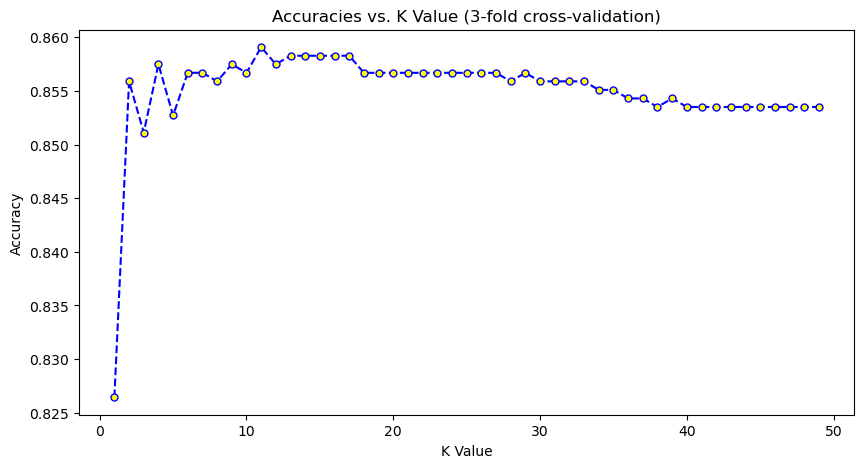

In [64]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
%matplotlib inline

k_range = range(1, 50)

k_scores = []
# we are performing 3-fold cross validation to select the best K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
plt.figure(figsize=(10,5))  
plt.plot(range(1,50),k_scores,color='blue', linestyle='dashed',marker='o',markerfacecolor='yellow', markersize=5)
plt.title('Accuracies vs. K Value (3-fold cross-validation)')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(k_scores),"at K =",(k_scores.index(max(k_scores))+1))

Minimum error:- 0.14092564890203374 at K = 11


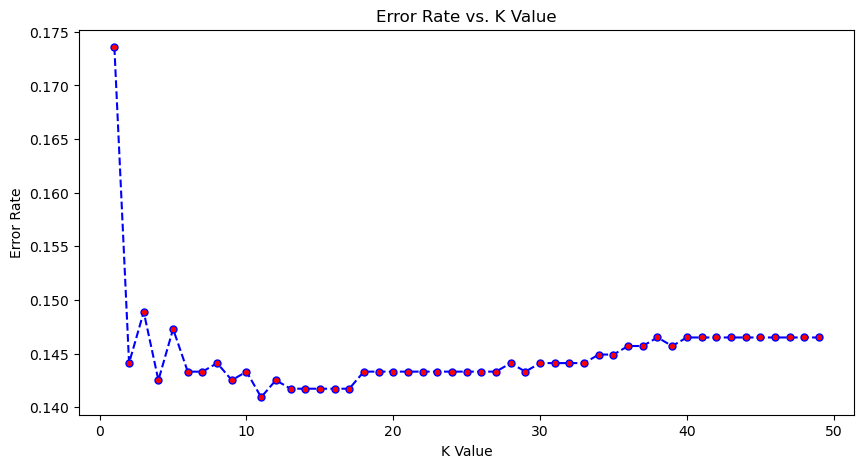

In [74]:
k_range = range(1, 50)
error_rate = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    error_rate.append(1-scores.mean())
plt.figure(figsize=(10,5))  
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",(error_rate.index(min(error_rate))+1))

In [84]:
# Therefore, from 3-fold cross validation we can see that the optimum choice for our k is 11 which balances overfitting
# Now we will calculate the accuracy on the accuracy on previously unseen data
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8385899814471243

In [85]:
print("Therefore in the model, we get an accuracy of ",(knn.score(X_test, y_test)))

Therefore in the model, we get an accuracy of  0.8385899814471243


In [86]:
#Credit to DTrimarchi10/confusion_matrix for the code on making beautiful confusion matrices
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf, group_names=None,categories='auto', count=True,percent=True,
                          cbar=True,xyticks=True,xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

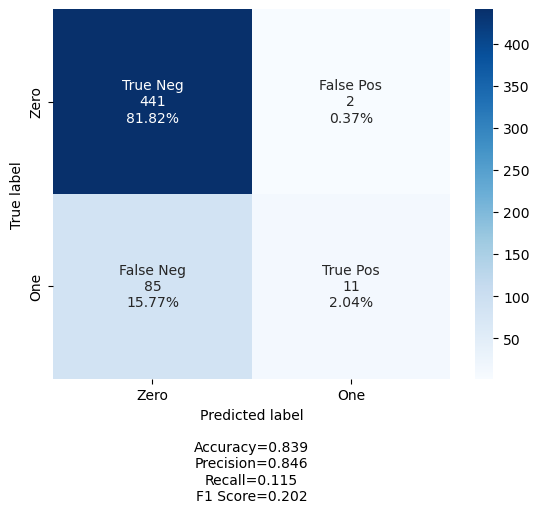

In [87]:

y_pred = knn.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)


labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Zero", "One"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Blues")


In [88]:
#Now predicting for week 16 people, our model can predict

In [89]:
print(predicting_self_isolate.shape)

(966, 35)


In [90]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
predicting_self_isolate
predictions = knn.predict(X_test)
print(sum(predictions))

15.0


In [91]:
# Therefore we predict that out of the 966 people who were interviewed in the final week, 15 should isolate